Создать и заполнить граф, нарисовать

Welcome to JupyROOT 6.18/04


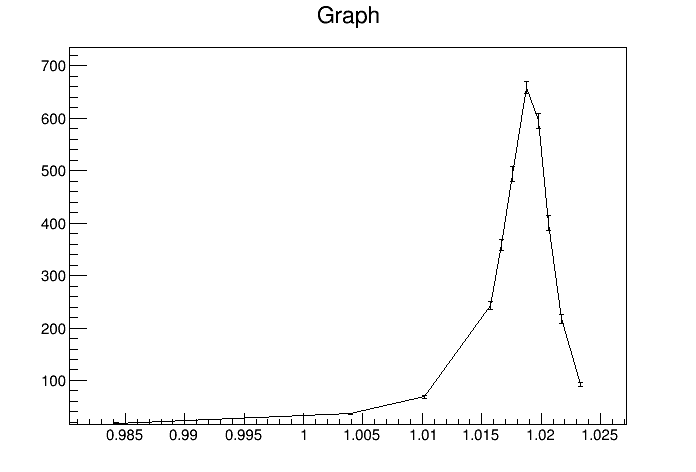

In [1]:
import ROOT
canvas = ROOT.TCanvas()

graph = ROOT.TGraphErrors("variant1.txt")
graph.Draw()
canvas.Draw()


Прикинуть из графика начальные параметры (высота пика A, положение M, ширина на полувысоте Γ)

In [2]:
A0 = 640
M0 = 1.018
G0 = 0.005

Подогнать функцией, получить параметры их ошибки, xi^2/Ndf, вероятность

In [3]:
def func(xx, pp):
    A = pp[0]
    M = pp[1]
    G = pp[2]
    E = xx[0]
    return A * ((G/2)**2) / ((E-M)**2 + (G/2)**2)

func = ROOT.TF1("func", func, 0.9, 1.1, 3)

func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

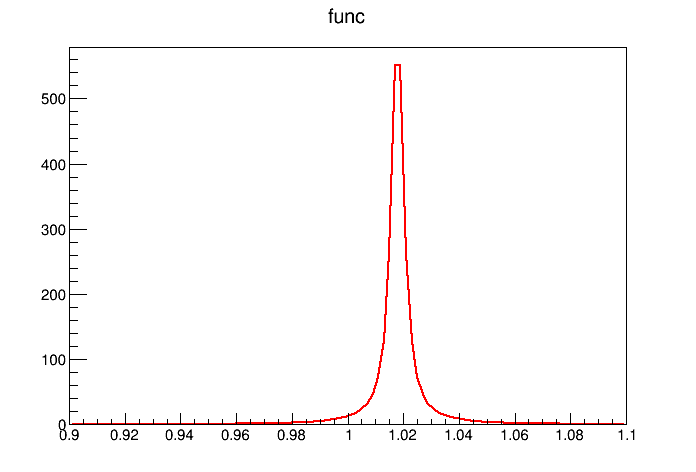

In [4]:
func.Draw()
canvas.Draw()

In [5]:
fit_res = graph.Fit(func, "S")
#S for result for saving result in TFitResultPtr

 FCN=801.248 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=6.45509e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.44648e+02   9.91982e+00   8.26239e-02   3.89220e-05
   2  p1           1.01858e+00   2.90706e-05   4.85697e-07   8.90523e+00
   3  p2           4.69357e-03   8.08951e-05   6.60462e-07   6.33666e+00


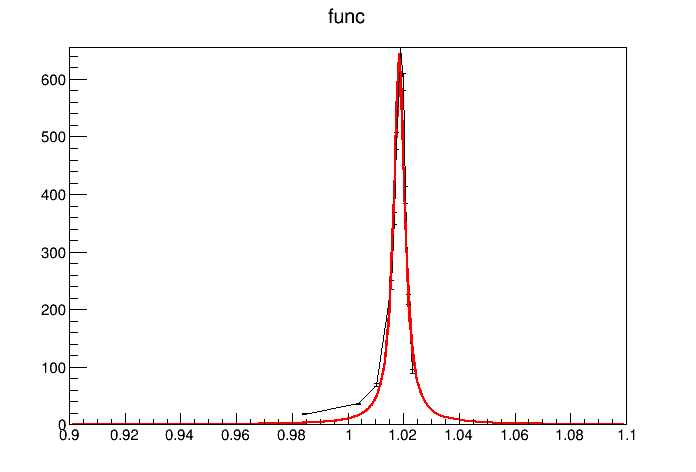

In [6]:
graph.Draw()
canvas.Draw()

Параметры, ошибки, chi^2/ndf, вероятность:

Double_t Prob(Double_t chi2, Int_t ndf)

Computation of the probability for a certain Chi-squared (chi2) and number of degrees of freedom (ndf). Represents the probability that the observed Chi-squared for a correct model should be less than the value chi2.

In [7]:
print("A = ", fit_res.Parameter(0), "\nA error = ", fit_res.ParError(0))

A =  644.6475737411142 
A error =  9.919823018791135


In [8]:
print("M =", fit_res.Parameter(1), "\nM error =", fit_res.ParError(1))

M = 1.0185810630156542 
M error = 2.9070618473911185e-05


In [9]:
print("G =", fit_res.Parameter(2), "\nG error =", fit_res.ParError(2))

G = 0.0046935706324983196 
G error = 8.089513468875232e-05


In [10]:
print("Chi^2/ndf = ", fit_res.Chi2()/fit_res.Ndf())

Chi^2/ndf =  100.15596506704233


In [11]:
probability = ROOT.TMath.Prob(fit_res.Chi2(), fit_res.Ndf())
print("P =", probability) # Probability that chi^2 in this model should be less than the value chi2.

P = 1.1081116616228352e-167


по эффективности: создать гистограммы для A, M, Γ, в цикле (1-1000):

In [12]:
A_eff = ROOT.TH1F("A_eff", "A_eff", 200, 620, 670)
M_eff = ROOT.TH1F("M_eff", "M_eff", 200, 1.018, 1.019)
G_eff = ROOT.TH1F("G_eff", "G_eff", 200, 0.00455, 0.00485)

xs = graph.GetX()
ys = graph.GetY()

func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

for j in range(1000): # по эффективности: создать гистограммы для A, M, Γ, в цикле (1-1000):
    ef_graph = ROOT.TGraphErrors() #  создать новый граф
    for i in range(graph.GetN()):
        err = ys[i]*0.01*xs[i]/1.02 # заполнить E’ -> E ; s’ -> RandomNorm(s, ошибка) GeV
        s = ROOT.gRandom.Gaus(0, err)
        ef_graph.SetPoint(i, xs[i], s + ys[i])
        ef_graph.SetPointError(i, graph.GetErrorX(i), graph.GetErrorY(i))
    fit = ef_graph.Fit(func, "SQ")
    A_eff.Fill(fit.Parameter(0))
    M_eff.Fill(fit.Parameter(1))
    G_eff.Fill(fit.Parameter(2))

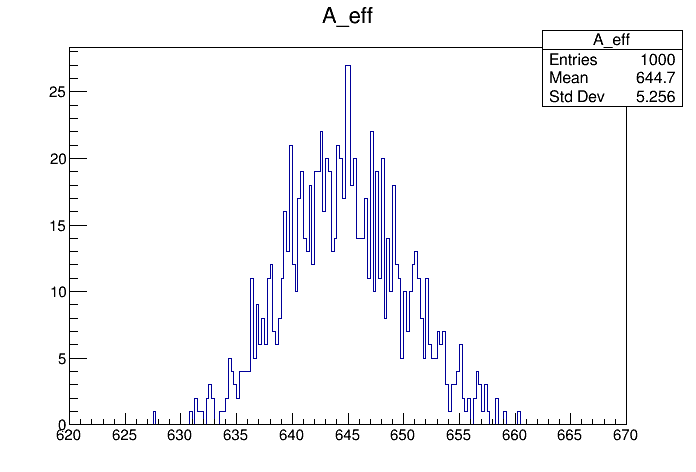

In [13]:
canvas.Clear()
A_eff.Draw()
canvas.Draw()

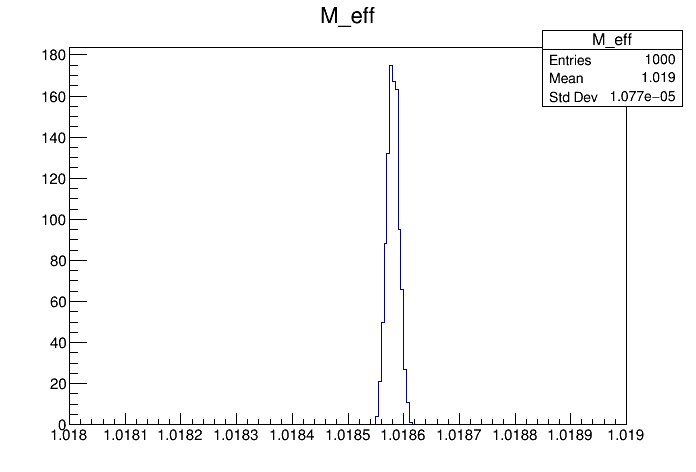

In [14]:
M_eff.Draw()
canvas.Draw()

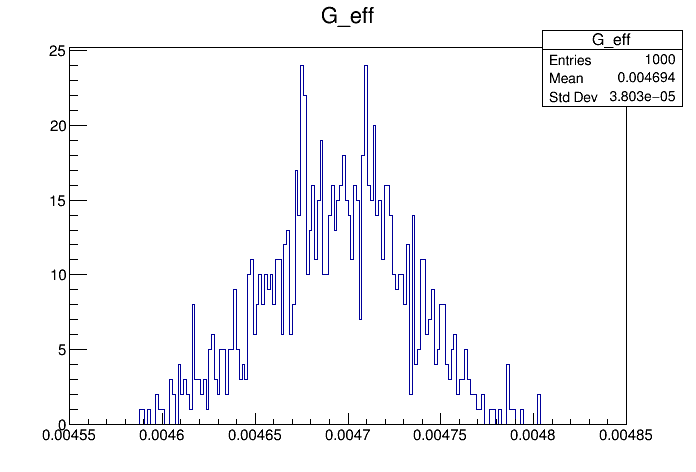

In [15]:
G_eff.Draw()
canvas.Draw()

In [16]:
# получить вклады в ошибки
print("A:", A_eff.GetRMS())
print("M:", M_eff.GetRMS())
print("G:", G_eff.GetRMS())

A: 5.256421421261425
M: 1.077320977520159e-05
G: 3.803067118566136e-05


по энергии: создать гистограммы, в цикле

In [17]:
A_energy = ROOT.TH1F("A_energy", "A_energy", 200, 644.6, 644.7)
M_energy = ROOT.TH1F("M_energy", "M_energy", 200, 1.0175, 1.0195)
G_energy = ROOT.TH1F("G_energy", "G_energy", 200, 0.004693, 0.004694)

func.SetParameter(0, A0)
func.SetParameter(1, M0)
func.SetParameter(2, G0)

for j in range(1000): # по энергии: создать гистограммы, в цикле
    new_graph = ROOT.TGraphErrors() # создать новый граф
    dE = ROOT.gRandom.Gaus(0, 0.0001) #  0.1Mev смещение dE = RandomNorm(0, ошибка в ГэВ)
    for i in range(graph.GetN()): # заполнить E’ -> E+dE; s’ -> s
        new_graph.SetPoint(i, xs[i] + dE, ys[i])
        new_graph.SetPointError(i, graph.GetErrorX(i), graph.GetErrorY(i))
    fit = new_graph.Fit(func, "SQ") # подогнать, скинуть значения
    A_energy.Fill(fit.Parameter(0))
    M_energy.Fill(fit.Parameter(1))
    G_energy.Fill(fit.Parameter(2))

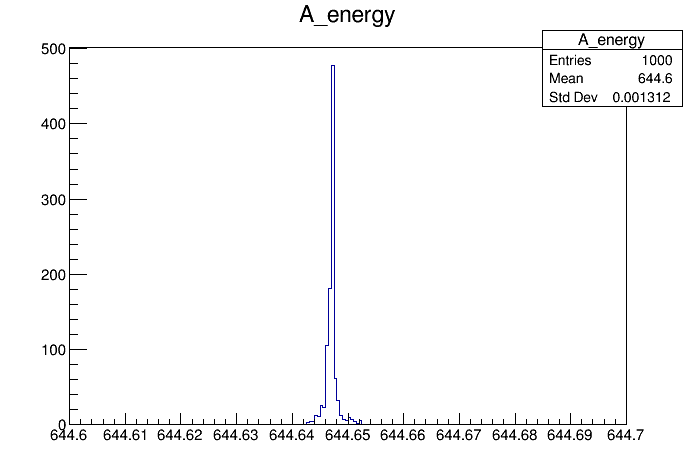

In [18]:
canvas.Clear()
A_energy.Draw()
canvas.Draw()

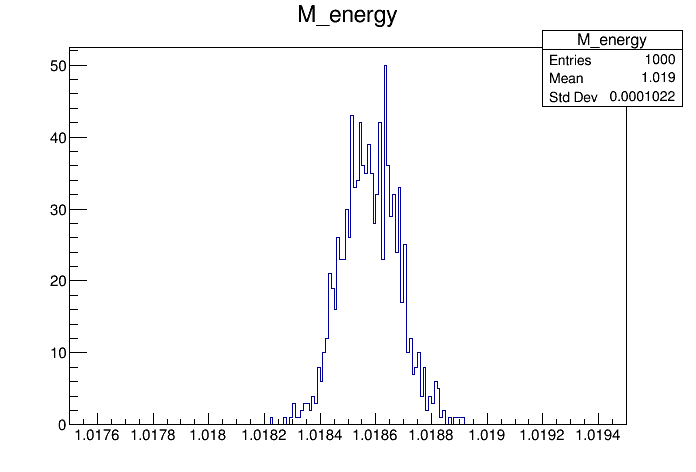

In [19]:
M_energy.Draw()
canvas.Draw()

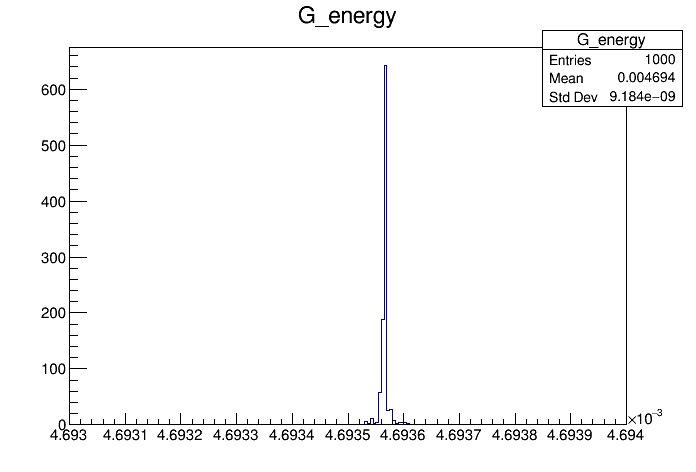

In [20]:
G_energy.Draw()
canvas.Draw()

In [21]:
# получить вклады в ошибки
print("A:", A_energy.GetRMS()/fit_res.ParError(0))
print("M:", M_energy.GetRMS()/fit_res.ParError(1))
print("G:", G_energy.GetRMS()/fit_res.ParError(2))

A: 0.0001323063373169476
M: 3.517011528755968
G: 0.00011352626884014403


объяснить, какой вклад ожидался, сравнить с полученным

In [22]:
from math import sqrt
Asq = 0

AF = fit_res.Parameter(0)
MF = fit_res.Parameter(1)
GF = fit_res.Parameter(2)

#for A eff

for i in range(graph.GetN()):
    Ei0 = xs[i]
    si0 = (AF*(GF/2)**2)/((Ei0 - MF)**2 + (GF/2)**2)
    ds = 0.01*(Ei0/1.02)*si0
    dAi = ds*((Ei0 - MF)**2 + (GF/2)**2)/((GF/2)**2)
    Asq += dAi**2
Asq = sqrt(Asq/graph.GetN())
Asq

6.408042481950256

In [23]:
A_eff.GetRMS()

5.256421421261425

In [24]:
# for G eff
from math import fabs
from math import sqrt

Gsq = 0
for i in range(graph.GetN()):
    Ei0 = xs[i]
    si0 = (AF*(GF/2)**2)/((Ei0 - MF)**2 + (GF/2)**2)
    ds = 0.01*(Ei0/1.02)*si0
    dGi = (1/((si0 + ds)**2))*sqrt(fabs((AF - si0 - ds)/(si0+ds)))*(Ei0 - MF)*ds
    Gsq += dGi**2
Gsq = sqrt(Gsq/graph.GetN())
Gsq

0.00047826329751004593

In [25]:
G_eff.GetRMS()

3.803067118566136e-05

In [26]:
Msq = 0

for i in range(graph.GetN()):
    Ei = xs[i]
    p = A0 / ((Ei-M0)**2 / (G0/2)**2 + 1)
    dpp = 0.01 * Ei / 1.02 #GeV
    dMi = A0 * G0 / 4 / p / sqrt(A0/p - 1) * dpp
    Msq += dMi**2
    
Msq = sqrt(Msq / graph.GetN())

In [27]:
# for energy
print("A:", A_energy.GetRMS())
print("M:", M_energy.GetRMS())
print("G:", G_energy.GetRMS())

A: 0.0013124554504486013
M: 0.00010224170032081187
G: 9.183722808534956e-09


In [28]:
# получить вклады в ошибки
print("Teor")
print("A:", A_eff.GetRMS())
print("M:", M_eff.GetRMS())
print("G:", G_eff.GetRMS())
print("Check")
print(Asq)
print(Msq)
print(Gsq)
print("Stat errors")
print(fit_res.ParError(0))
print(fit_res.ParError(1))
print(fit_res.ParError(2))

Teor
A: 5.256421421261425
M: 1.077320977520159e-05
G: 3.803067118566136e-05
Check
6.408042481950256
6.499693828242312e-05
0.00047826329751004593
Stat errors
9.919823018791135
2.9070618473911185e-05
8.089513468875232e-05


# Через 3 точки


In [61]:
A_estimation = fit_res.Value(0)
M_estimation = fit_res.Value(1)
G_estimation = fit_res.Value(2)

In [62]:
print(A_estimation)
print(G_estimation)
print(M_estimation)

644.6475737411142
0.0046935706324983196
1.0185810630156542


In [66]:
A = A_estimation
G = G_estimation
M = M_estimation
Const= 0.01/1.02

ds1 = Const * A/2*(M-G/2)
ds2 = Const * A*(M)
ds3 = Const * A/2*(M+G/2)
print("ds1: ", ds1)
print("ds2: ", ds2)
print("ds3: ", ds3)

ds1:  3.2113380464288
ds2:  6.437507950310652
ds3:  3.2261699038818517


In [67]:
#ожидаем
dA = sqrt(ds2 ** 2)
dG = G/A * sqrt(ds1 ** 2 + ds2 ** 2 + ds3 ** 2)
dM = G/(2*A) * sqrt(ds1 ** 2 + ds3 ** 2)

In [68]:
print("hist eff")
print("A:", A_eff.GetRMS())
print("M:", M_eff.GetRMS())
print("G:", G_eff.GetRMS())
print("Check")
print("A: ", dA)
print("M: ", dM)
print("G: ", dG)
print("Stat errors")
print("A: ", fit_res.ParError(0))
print("M: ", fit_res.ParError(1))
print("G: ", fit_res.ParError(2))

hist eff
A: 5.256421421261425
M: 1.077320977520159e-05
G: 3.803067118566136e-05
Check
A:  6.437507950310652
M:  1.657123754941092e-05
G:  5.740434918683011e-05
Stat errors
A:  9.919823018791135
M:  2.9070618473911185e-05
G:  8.089513468875232e-05
